# Exploratory Data Analysis

In [23]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('/Users/zxgan/FYP_Kubernetes/Dataset/Feature_Engineered/node_node_0_feature_engineered.csv')

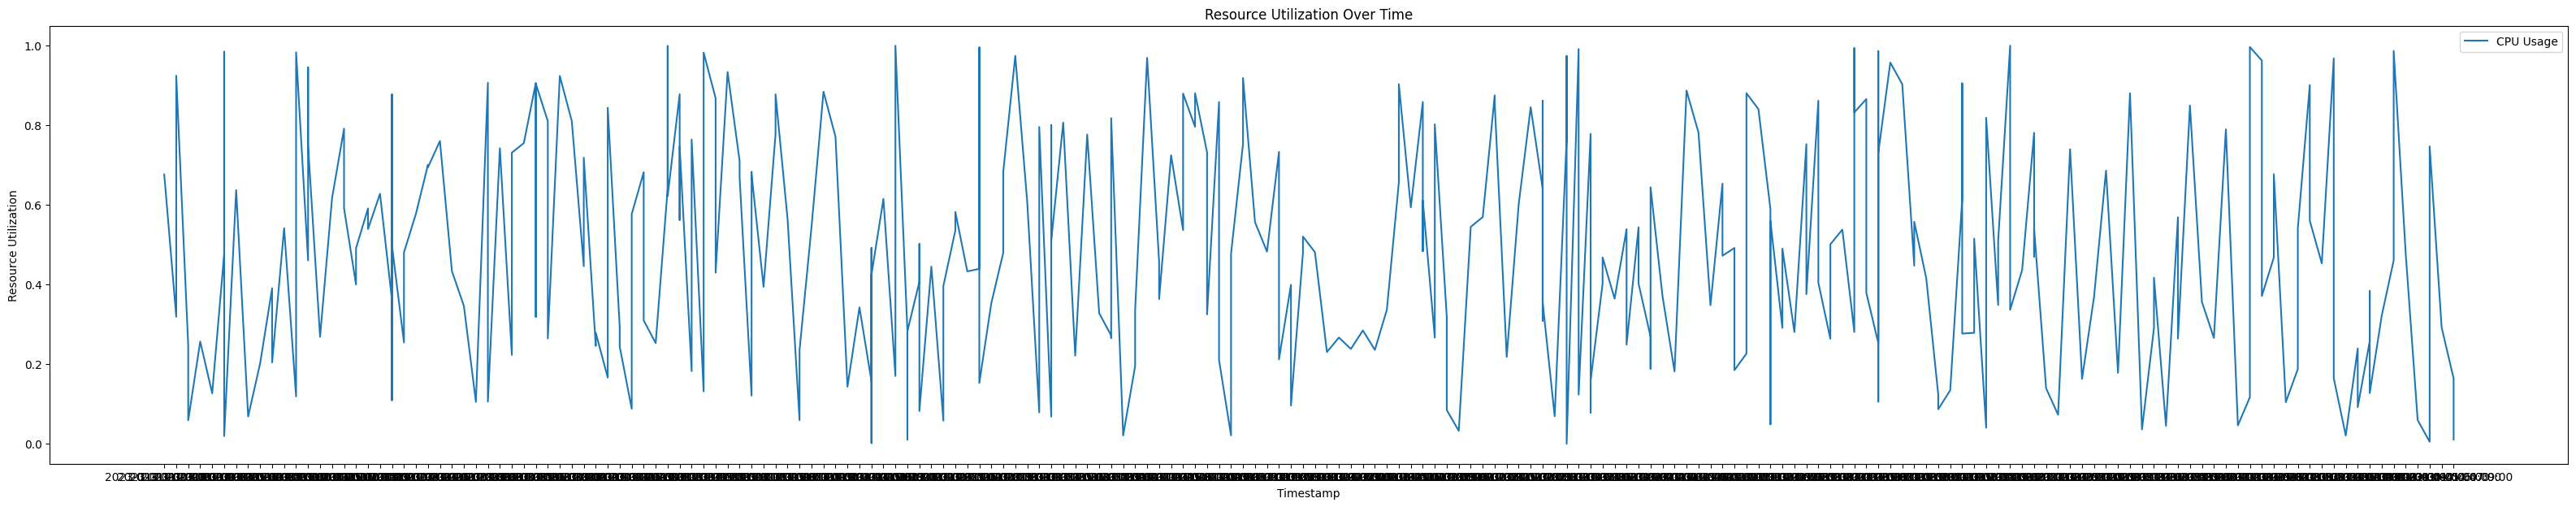

In [24]:
# Time-Series Plot

plt.figure(figsize=(40, 7))
plt.plot(data['timestamp'], data['cpu_usage'], label='CPU Usage')
plt.xlabel('Timestamp')
plt.ylabel('Resource Utilization')
plt.title('Resource Utilization Over Time')
plt.legend()
plt.show()

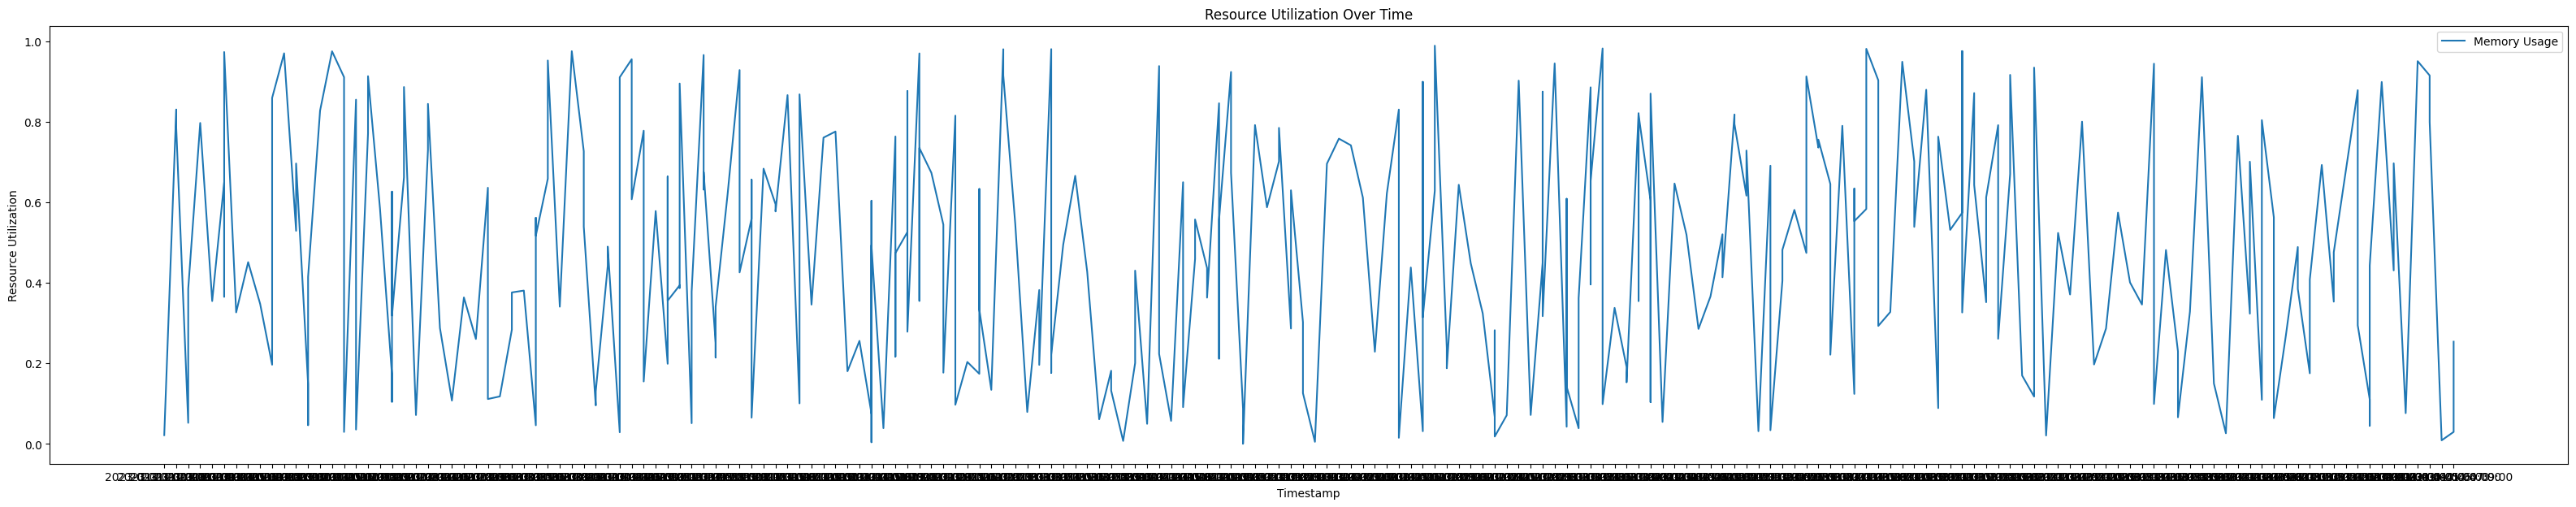

In [25]:
plt.figure(figsize=(40, 7))
plt.plot(data['timestamp'], data['memory_usage'], label='Memory Usage')
plt.xlabel('Timestamp')
plt.ylabel('Resource Utilization')
plt.title('Resource Utilization Over Time')
plt.legend()
plt.show()

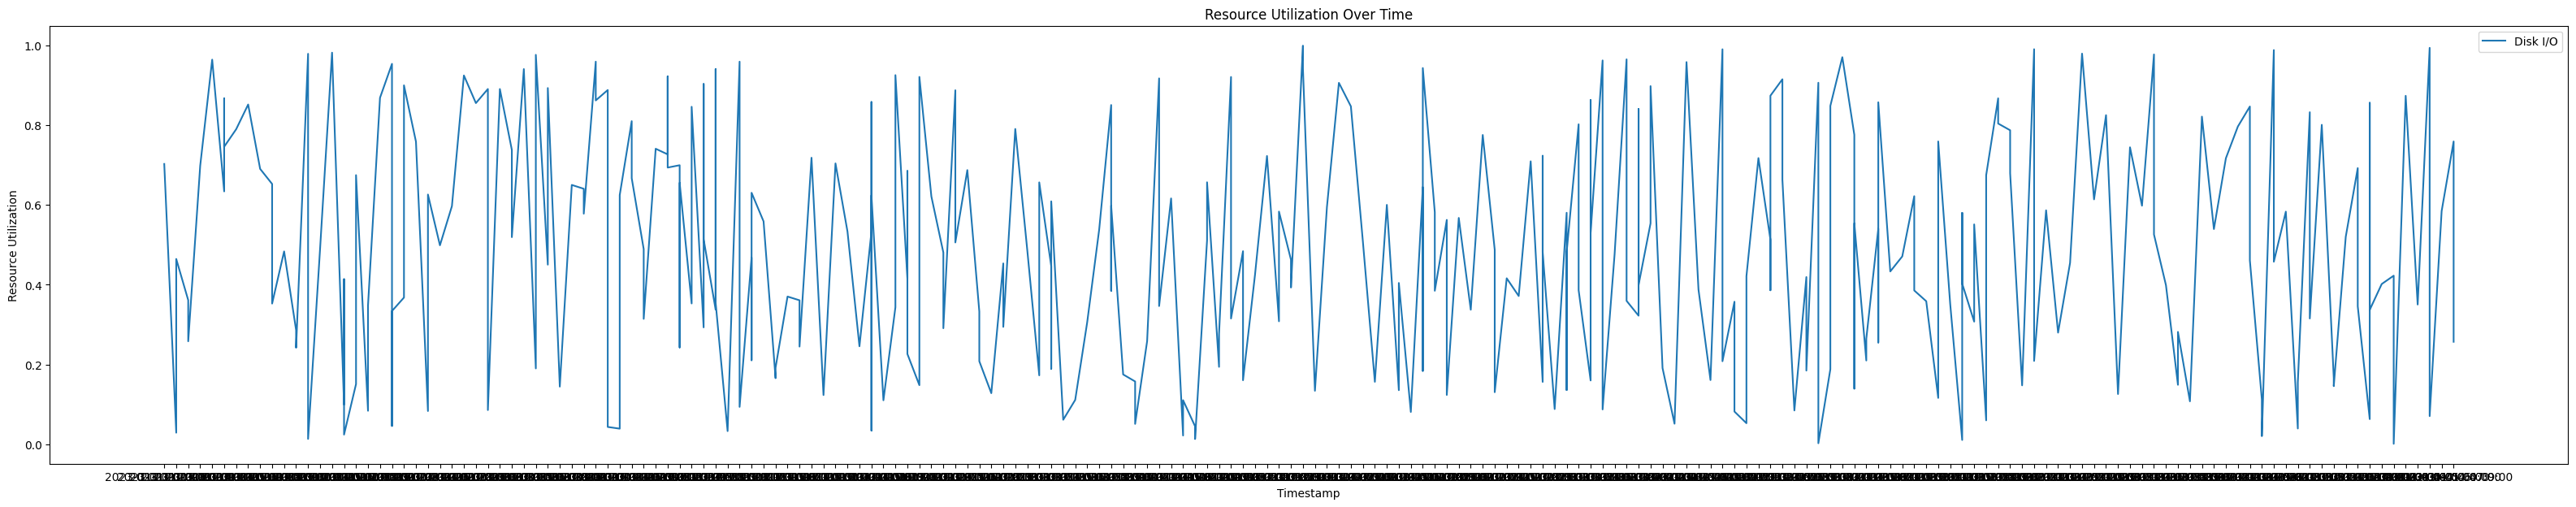

In [26]:
plt.figure(figsize=(40, 7))
plt.plot(data['timestamp'], data['disk_io'], label='Disk I/O')
plt.xlabel('Timestamp')
plt.ylabel('Resource Utilization')
plt.title('Resource Utilization Over Time')
plt.legend()
plt.show()

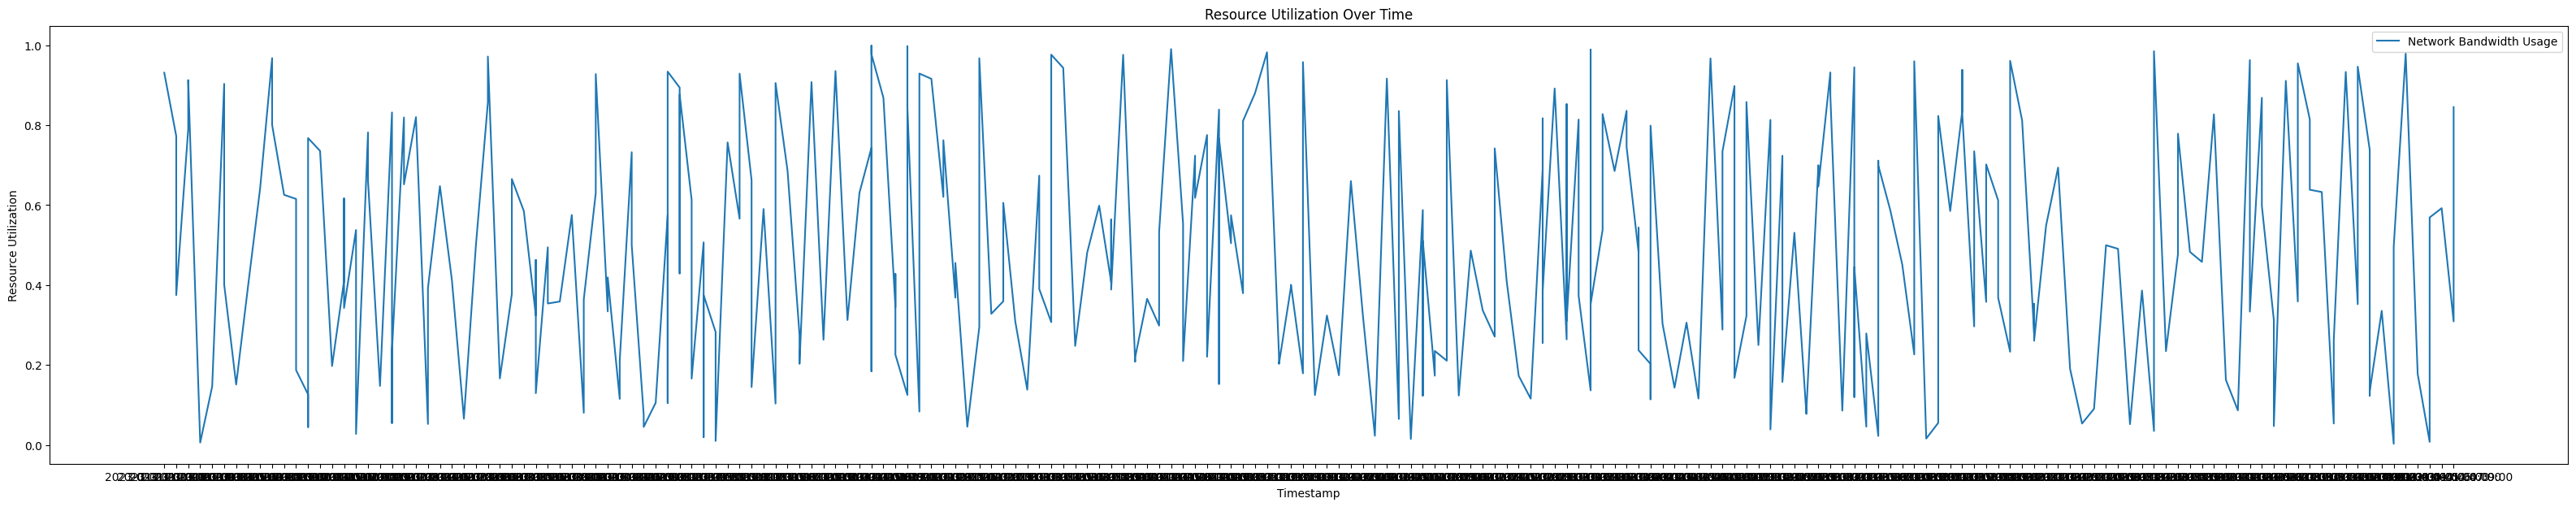

In [27]:
plt.figure(figsize=(40, 7))
plt.plot(data['timestamp'], data['network_bandwidth_usage'], label='Network Bandwidth Usage')
plt.xlabel('Timestamp')
plt.ylabel('Resource Utilization')
plt.title('Resource Utilization Over Time')
plt.legend()
plt.show()

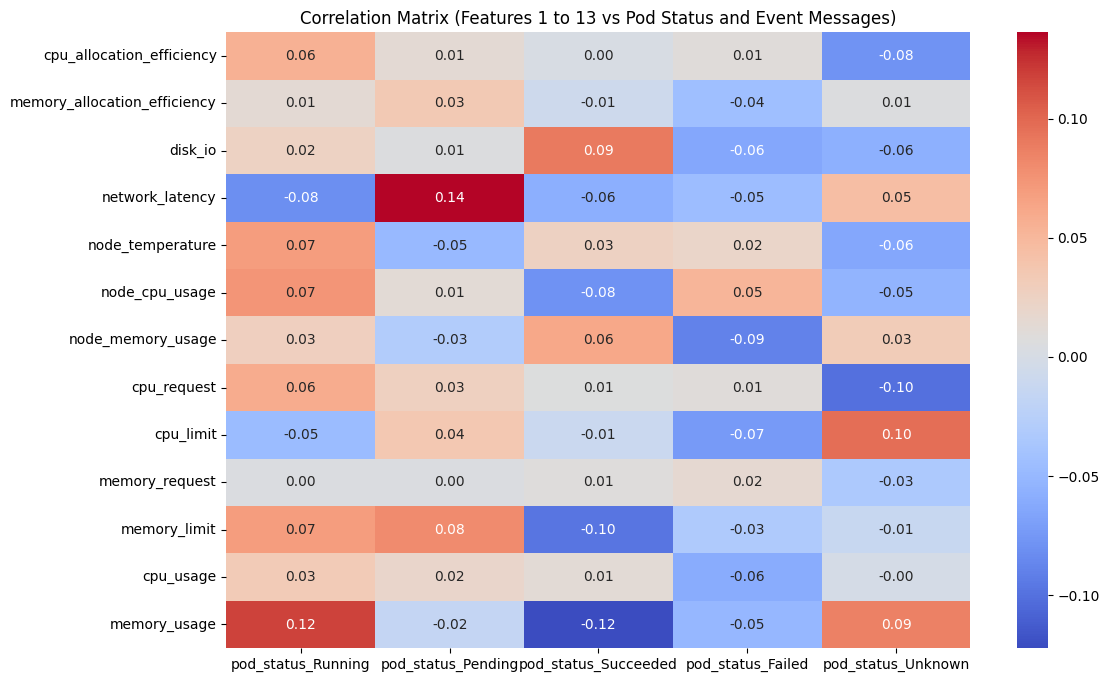

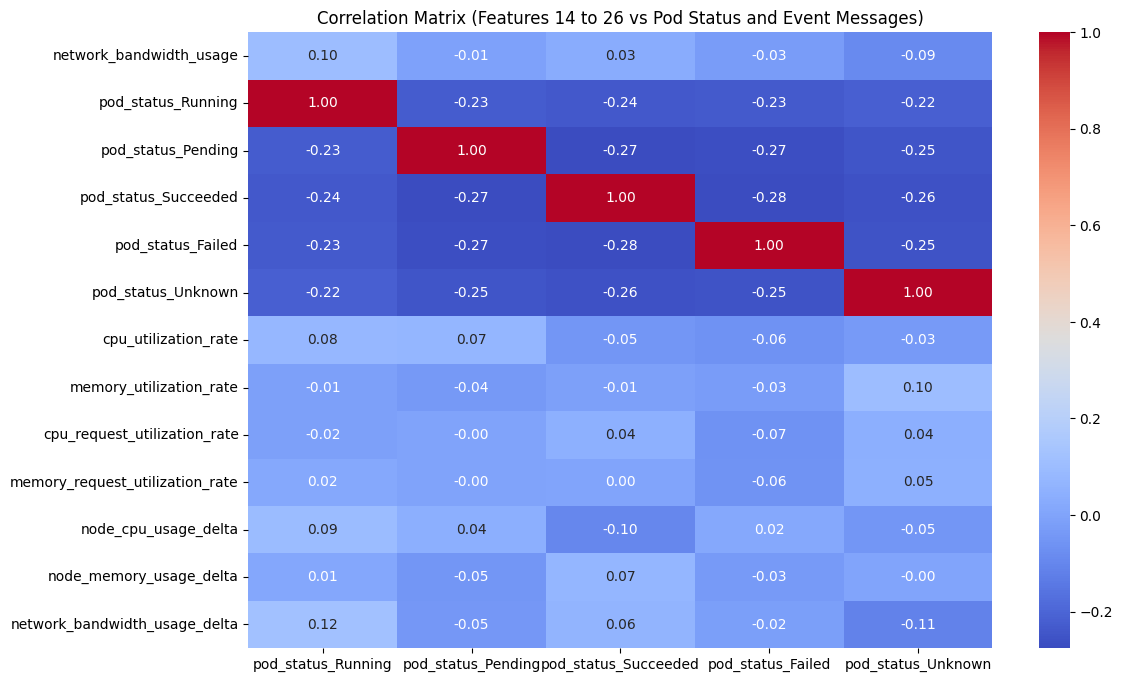

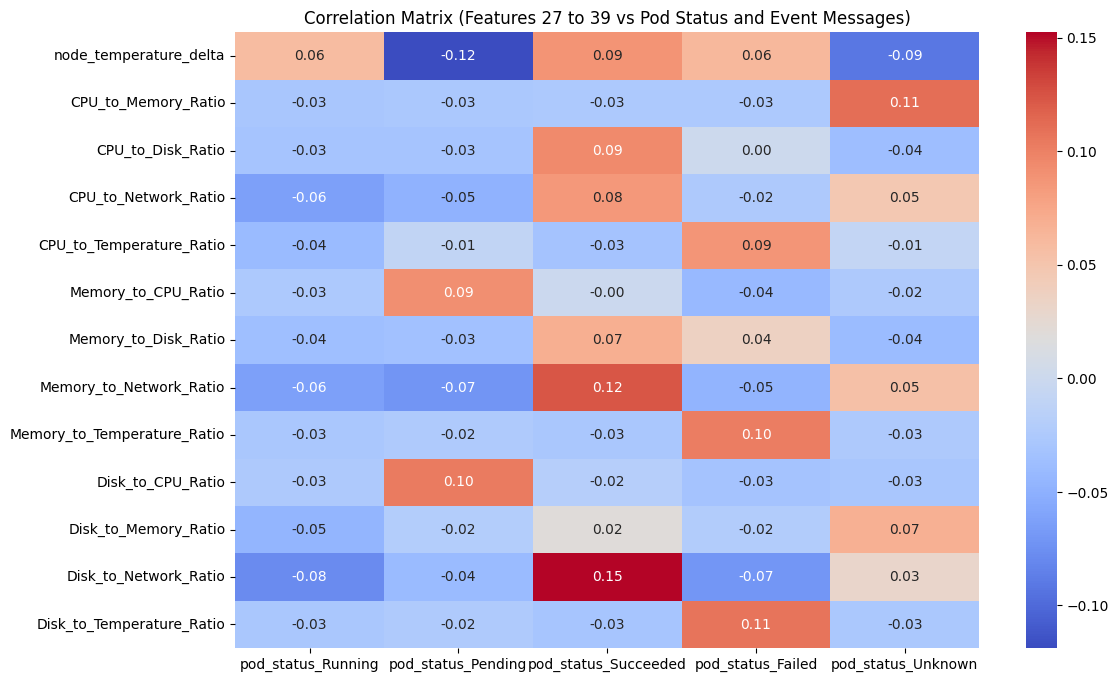

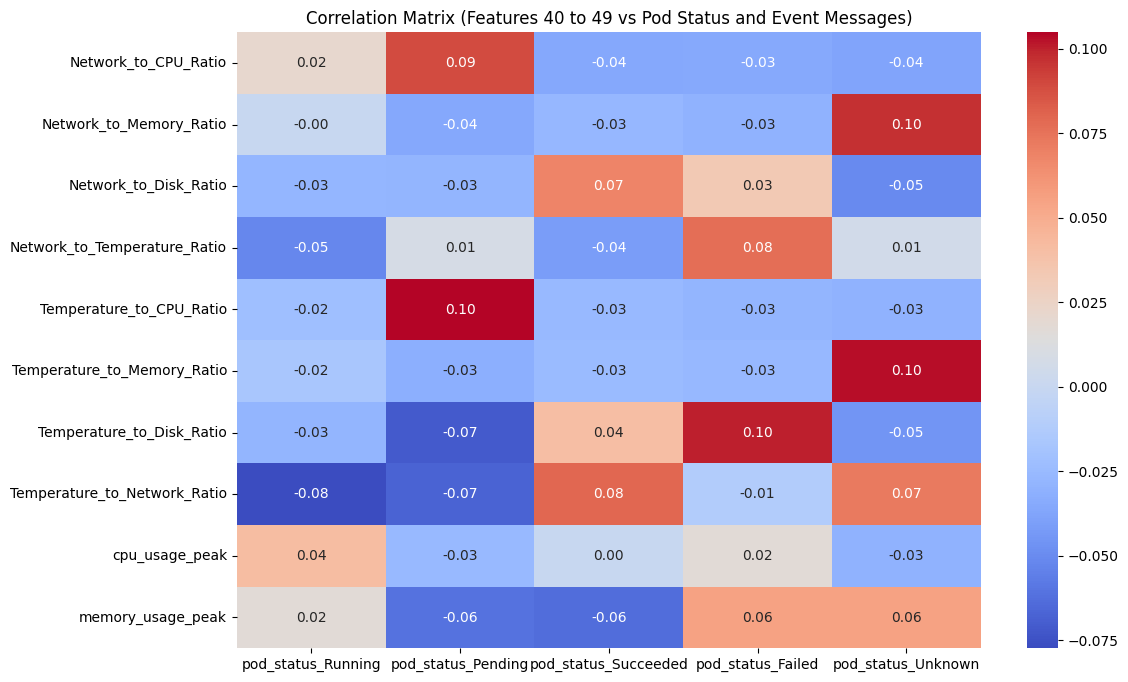

In [28]:
correlation_matrix = data.drop(columns=['timestamp']).corr()
# Filter correlation matrix to identify 'pod_status' and 'event_message' features
pod_status_columns = [col for col in correlation_matrix.columns if "pod_status" in col]
event_message_columns = [col for col in correlation_matrix.columns if "event_message" in col]

# Focus on all features compared to 'pod_status' and 'event_message'
focus_columns = pod_status_columns + event_message_columns
comparison_matrix = correlation_matrix.loc[:, focus_columns]

# Splitting the comparison matrix into smaller sub-matrices for better visualization
comparison_size = 13  # Number of features per sub-matrix
total_comparison_features = comparison_matrix.shape[0]
num_comparison_plots = (total_comparison_features // comparison_size) + (1 if total_comparison_features % comparison_size != 0 else 0)

# Generate sub-matrices and visualize them
for i in range(num_comparison_plots):
    start_idx = i * comparison_size
    end_idx = min(start_idx + comparison_size, total_comparison_features)
    sub_comparison_matrix = comparison_matrix.iloc[start_idx:end_idx, :]

    plt.figure(figsize=(12, 8))
    sns.heatmap(sub_comparison_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(f"Correlation Matrix (Features {start_idx + 1} to {end_idx} vs Pod Status and Event Messages)")
    plt.show()

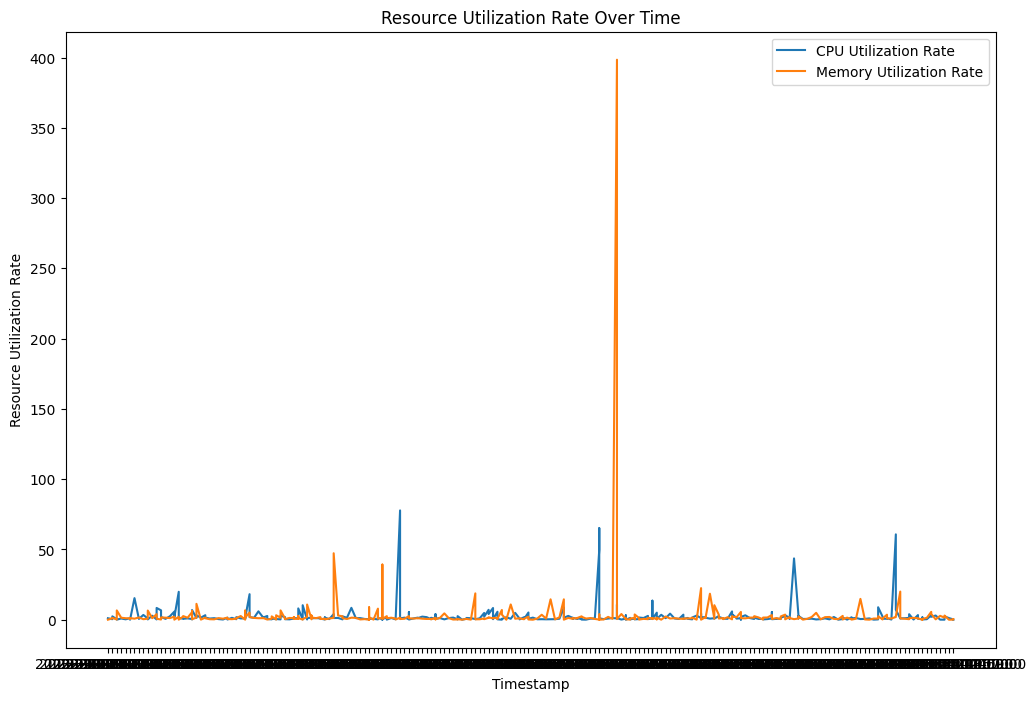

In [29]:
#Resource Utilization Trends
plt.figure(figsize=(12, 8))
plt.plot(data['timestamp'], data['cpu_utilization_rate'], label='CPU Utilization Rate')
plt.plot(data['timestamp'], data['memory_utilization_rate'], label='Memory Utilization Rate')
plt.xlabel('Timestamp')
plt.ylabel('Resource Utilization Rate')
plt.title('Resource Utilization Rate Over Time')
plt.legend()
plt.show()

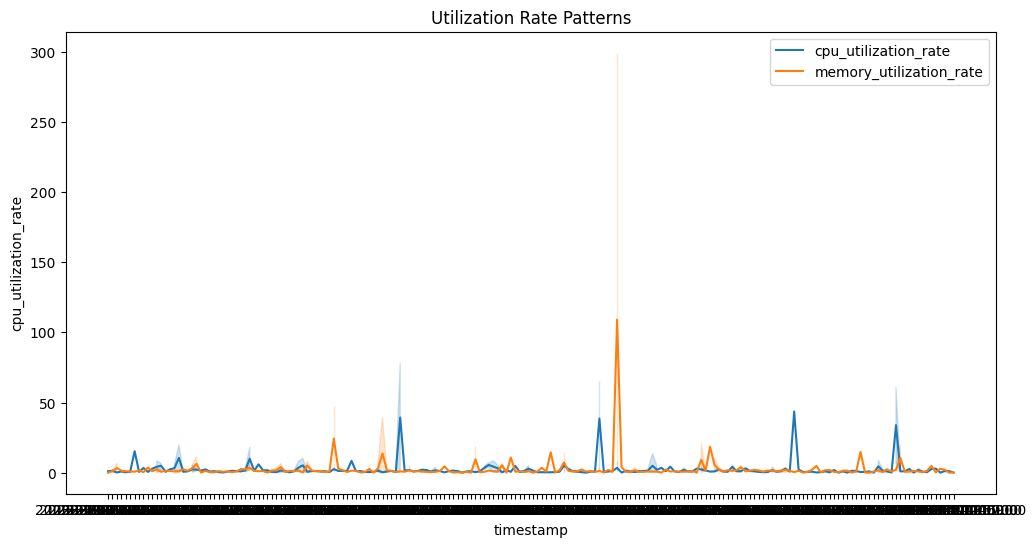

In [30]:
import seaborn as sns

# Plot utilization rates
utilization_cols = ['cpu_utilization_rate', 'memory_utilization_rate']
plt.figure(figsize=(12, 6))
for col in utilization_cols:
    sns.lineplot(data=data, x='timestamp', y=col, label=col)
plt.title("Utilization Rate Patterns")
plt.legend()
plt.show()

Peak Usage Counts:
 cpu_usage_peak       187
memory_usage_peak    184
dtype: int64


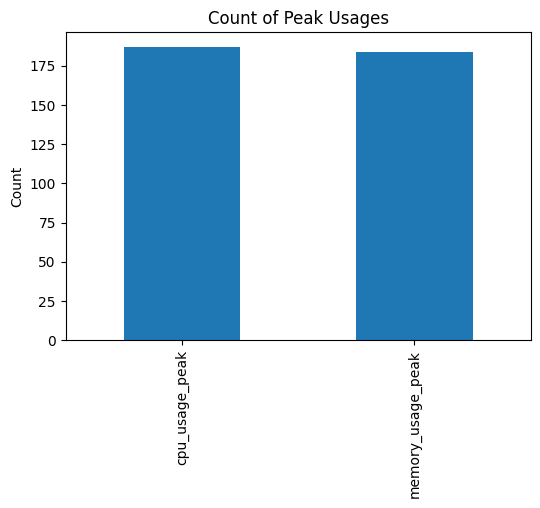

In [31]:
# Aggregate peak usage
peak_usage = data[['cpu_usage_peak', 'memory_usage_peak']].sum()
print("Peak Usage Counts:\n", peak_usage)

# Visualize peak usage
peak_usage.plot(kind='bar', figsize=(6, 4))
plt.title("Count of Peak Usages")
plt.ylabel("Count")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


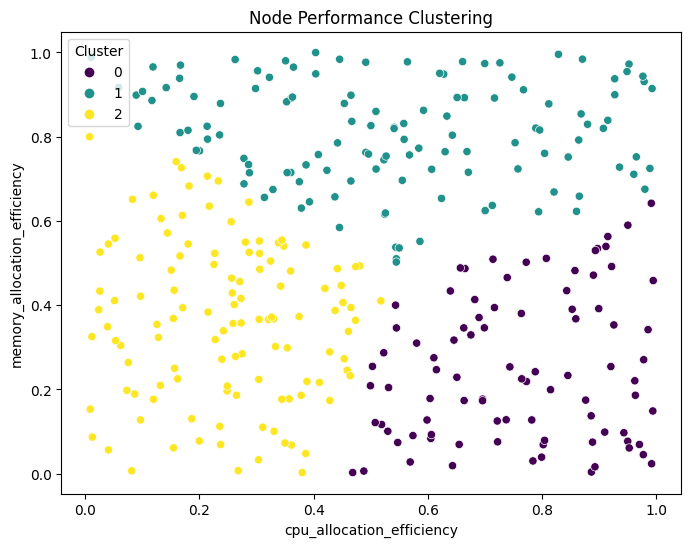

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize metrics
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['cpu_allocation_efficiency', 'memory_allocation_efficiency']])

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='cpu_allocation_efficiency', y='memory_allocation_efficiency', hue='Cluster', palette='viridis')
plt.title("Node Performance Clustering")
plt.show()

Number of anomalies detected: 0


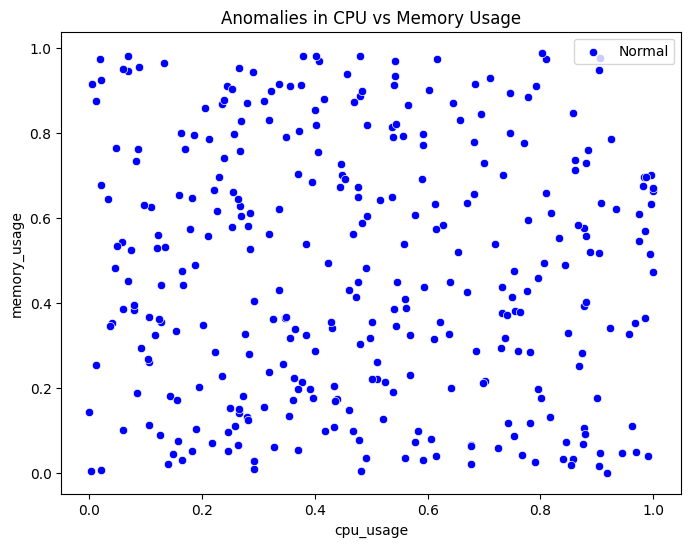

In [33]:
# Calculate z-scores
from scipy.stats import zscore

data['z_score_cpu'] = zscore(data['cpu_usage'])
data['z_score_memory'] = zscore(data['memory_usage'])

# Identify anomalies (z-score threshold > 3)
anomalies = data[(data['z_score_cpu'].abs() > 3) | (data['z_score_memory'].abs() > 3)]
print(f"Number of anomalies detected: {len(anomalies)}")

# Visualize anomalies
plt.figure(figsize=(8, 6))
sns.scatterplot(data=anomalies, x='cpu_usage', y='memory_usage', color='red', label='Anomalies')
sns.scatterplot(data=data, x='cpu_usage', y='memory_usage', color='blue', label='Normal')
plt.title("Anomalies in CPU vs Memory Usage")
plt.legend()
plt.show()

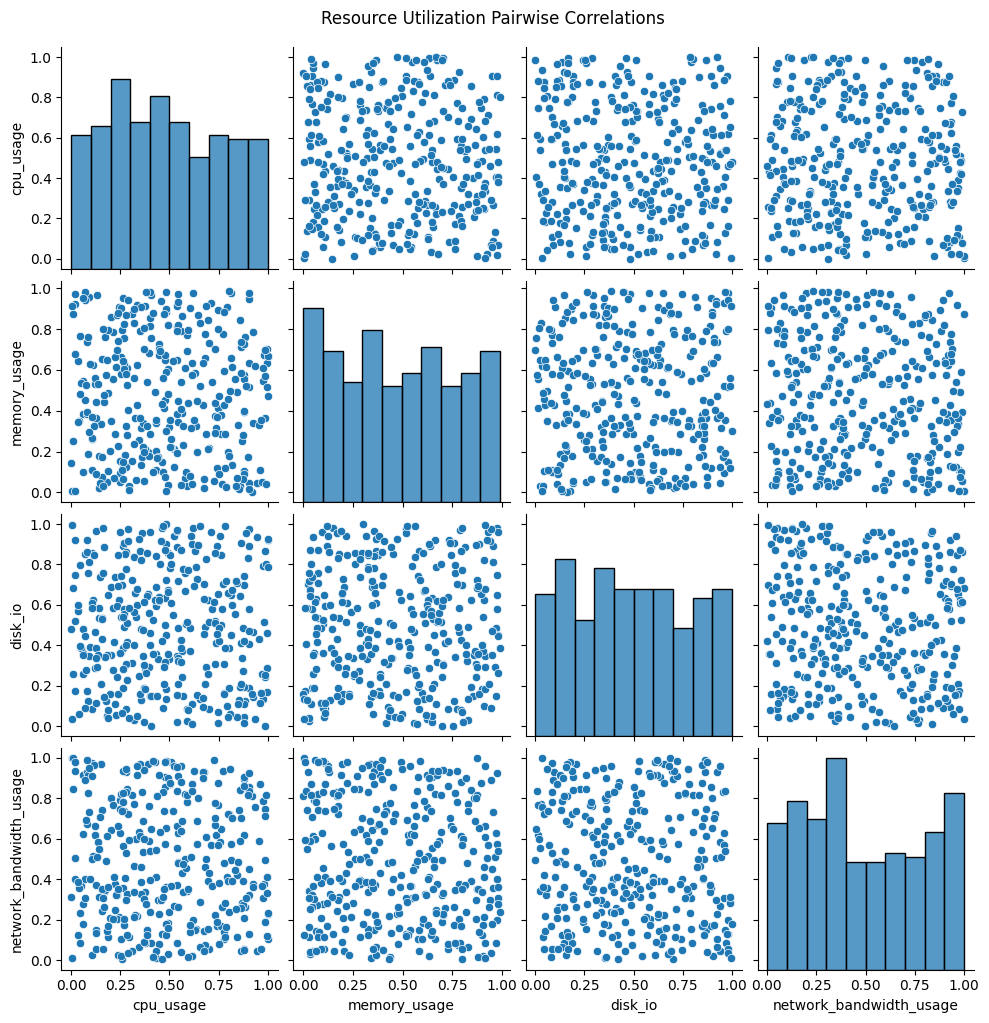

In [34]:
# Pairplot for resource metrics
resource_cols = ['cpu_usage', 'memory_usage', 'disk_io', 'network_bandwidth_usage']
sns.pairplot(data[resource_cols])
plt.suptitle("Resource Utilization Pairwise Correlations", y=1.02)
plt.show()